In [2]:
# Ian Ong
# 9.12.2020

import sys
# let python know where installed packages are
sys.path.append('/home1/i/ianzyong/.conda/envs/network_states/lib/python3.6/site-packages')
import os
import time
import _pickle as cPickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import bct

print('All modules imported.')

All modules imported.


In [3]:
# TODO: load in pickle files, unpickle as needed
path = '/gdrive/public/DATA/Human_Data/BIDS_processed/sub-RID0424/connectivity_matrices/functional/eeg/'
files = os.listdir(path)

# unpickling leads to an error within pandas? possibly update pandas for the anaconda installation on the server

#pickleData = [pd.read_pickle("{}/{}".format(path,x)) for x in files] # read all pickle files
#functionalArrays = [fileData[0:5] for fileData in pickleData] # take numeric data
#functional = np.concatenate(functionalArrays, axis=-1) # merge numeric data

# use a test array for now
test_data = np.load('../data/test_data.npy')
print("Array dimensions: " + str(test_data.shape))

test_data = np.moveaxis(test_data,2,0) # make the first axis the time axis
print("Array dimensions: " + str(test_data.shape))

Array dimensions: (72, 72, 400)
Array dimensions: (400, 72, 72)


In [4]:
# Track network metrics over time
# calculate network metrics over time

print("Calculating metrics...")

start = time.time()
# get mean clustering coefficients
mean_cc = [np.mean(bct.clustering_coef_wu(arr)) for arr in test_data]
end = time.time()

print("MCC: Done. Time elapsed = " + str(round(end-start,6)) + " seconds")

start = time.time()
# get mean node strength
mean_strength = [np.mean(bct.strengths_und(arr)) for arr in test_data]
end = time.time()

print("Mean node strength: Done. Time elapsed = " + str(round(end-start,6)) + " seconds")

start = time.time()
# get modularity
modularity = [bct.modularity_und(arr)[1] for arr in test_data]
end = time.time()

print("Modularity: Done. Time elapsed = " + str(round(end-start,6)) + " seconds")

start = time.time()
# get characteristic path length
char_path = [np.mean(bct.distance_wei(arr)[1]) for arr in test_data]
end = time.time()

print("CPL: Done. Time elapsed = " + str(round(end-start,6)) + " seconds")

Calculating metrics...
MCC: Done. Time elapsed = 0.521312 seconds
Mean node strength: Done. Time elapsed = 0.027086 seconds
Modularity: Done. Time elapsed = 29.672358 seconds
CPL: Done. Time elapsed = 170.65663 seconds


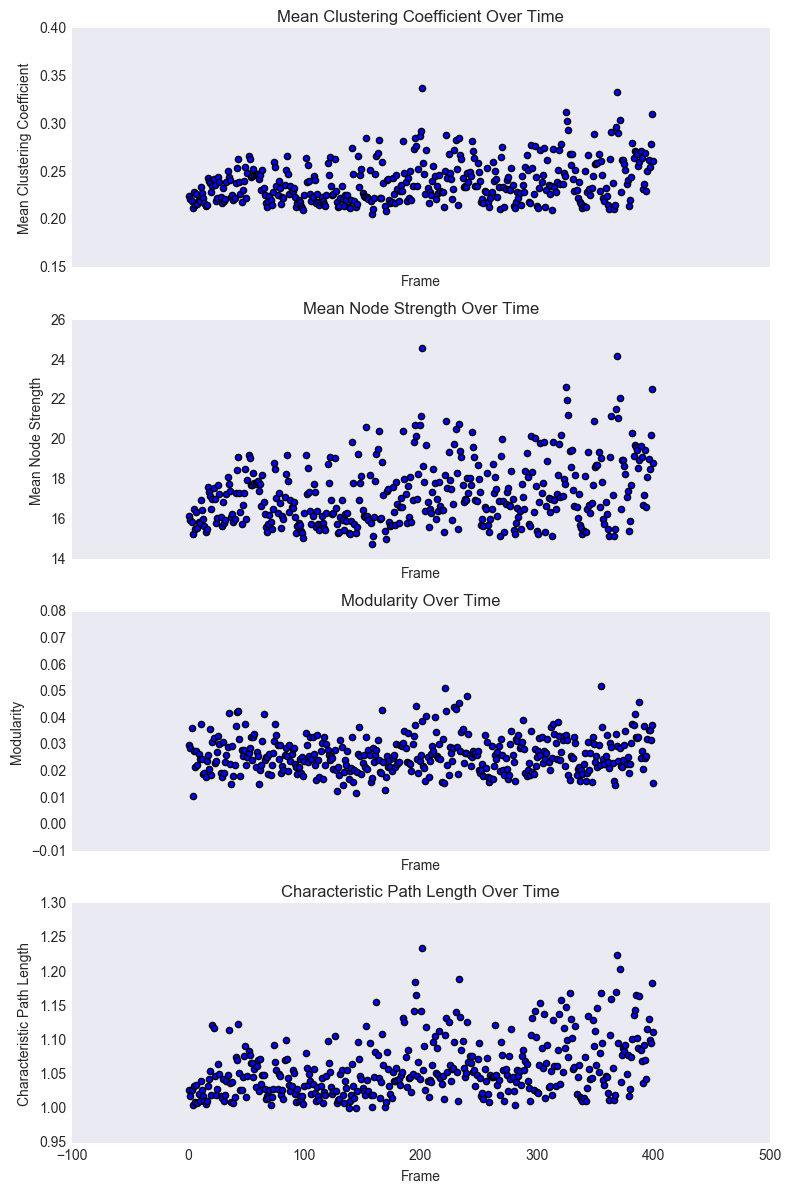

In [9]:
# plot network metrics

sns.set_style("dark")
f, axarr = plt.subplots(4, sharex=True, figsize=(8,12))

axarr[0].scatter(np.arange(1,len(test_data)+1),mean_cc)
axarr[0].set_title("Mean Clustering Coefficient Over Time")
axarr[0].set_xlabel("Frame")
axarr[0].set_ylabel("Mean Clustering Coefficient")

axarr[1].scatter(np.arange(1,len(test_data)+1),mean_strength)
axarr[1].set_title("Mean Node Strength Over Time")
axarr[1].set_xlabel("Frame")
axarr[1].set_ylabel("Mean Node Strength")

axarr[2].scatter(np.arange(1,len(test_data)+1),modularity)
axarr[2].set_title("Modularity Over Time")
axarr[2].set_xlabel("Frame")
axarr[2].set_ylabel("Modularity")

axarr[3].scatter(np.arange(1,len(test_data)+1),char_path)
axarr[3].set_title("Characteristic Path Length Over Time")
axarr[3].set_xlabel("Frame")
axarr[3].set_ylabel("Characteristic Path Length")

plt.tight_layout() # use tight layout for subplots
#plt.subplots_adjust(bottom=0.1) # fix margins
plt.show()

In [6]:
# Construct network configuration similarity matrix

In [7]:
# Implement Mapper algorithm

In [8]:
# Diagnostics
print(pd.__version__)
!python -V
from platform import python_version
print(python_version())

0.18.1
Python 3.5.2 :: Anaconda 4.2.0 (64-bit)
3.5.2
